In [ ]:
#Claire Roush
#26 October, 2016
#Regression for data set found at https://www.kaggle.com/harlfoxem/housesalesprediction
#using Standard Gradient Descent Regressor

import pandas
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn import cross_validation as cv
from sklearn.preprocessing import StandardScaler

sgd = SGDRegressor(eta0=0.000000000001,n_iter=750,loss='squared_epsilon_insensitive',learning_rate='constant')
scaler = StandardScaler(with_mean='False')

house_data = pandas.read_csv('kc_house_data.csv')

(house_train, house_test) = cv.train_test_split(house_data, test_size = 0.2)

predictors = house_data.columns.values[2:]
print(predictors)

#normalize the data
scaler.fit(house_train[predictors])
scaler.transform(house_train[predictors])
scaler.transform(house_test[predictors])

sgd.fit(house_train[predictors], house_train['price'])

house_predictions = sgd.predict(house_test[predictors])

print(metrics.mean_squared_error(house_test['price'], house_predictions))
print(metrics.mean_absolute_error(house_test['price'], house_predictions))

#need to normalize this
#mpg_train

### Housing Data Regression Using Stochastic Gradient Descent###

#### The Data Set ####
The data set selected is from ```https://www.kaggle.com/harlfoxem/housesalesprediction```.
From the description:
"This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015."

I selected this data set because I'm in the process of buying a house so it was very relatable. The prediction columns are ```['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15''sqft_lot15']``` with a target column of ```price```. There were no missing values, so the only preparation I did was to scale the attributes, as discussed below.


#### Learning Rate (eta0) ####

The error rates with default SGDRegressor was abysmal, at ```5.97743598434e+39``` for Mean Squared Error (MSE) and ```6.55645550409e+19``` for Mean Absolute Error (MAE). The first thing I did was to set the eta0 to ```0.000001```, which yielded a MSE of ```1.3010661488e+33``` and a MAE of ```2.53670148727e+15```. Then I tried an eta0 value of ```0.000000000001``` which yielded a 46.3 MSE value and a 5.3 MAE. The next step was to find an epoch value that yielded better results. 

#### Epoch Values ####

I selected a variety of epoch values: ```5, 25, 50, 100, 500, 750, 1000``` and plotted their respective average Mean Squared Error values over 10 runs.

![Epoch Values](epochValueGraph.png)

The numeric average Mean Squared Error values are as follows:

| Epochs        | Average MSE   
| ------------- |:-------------:|
| 5             | 38.7          |
| 25            | 9.3           |
| 50            | 6.4           |
| 100           | 6.9           |
| 500           | 3.4           |
| 750           | 6.2           |
| 1000          | 4.0           |


Though I did not run the algorithm 10 times for 2500 epochs to record MSE values, any small benefit didn't seem worth the time needed to run, and didn't meet the 3.4 MSE value of 500 epochs. 500 epochs seemed to be the 'sweet spot' at this time.

#### Loss ####

The SGDRegressor documentation states that loss defaults to ```squared_loss```. I was curious whether a different loss function would yield smaller error values. A loss function of ```huber``` was catastrophic, but the ```squared_epsilon_insensitive``` function yielded slightly better results. Over 10 runs, the average MSE values were:

| Squared Loss  | SEI           |
| ------------- |:-------------:|
| 3.4           | 2.87          |


#### Learning Rate Schedule ####

A learning rate schedule of ```constant``` yielded much better results than the default ```optimal```. Over 10 test runs, the MSE values were:

| Default       | Constant      |
| ------------- |:-------------:|
| 3.4           | 0.0168        |

#### Normalization ####

The SGDRegressor documentation says that the SGD algorithm is sensitive to feature scaling. I used ```StandardScaler``` to scale the training and test set, which didn't seem to help error values.


| Not Scaled    | Scaled        |
| ------------- |:-------------:|
| 0.0168        | 0.1846        |



In [128]:
#Claire Roush
#October 27, 2016
#Regression for same data set with 
import pandas
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn import model_selection as cv
from sklearn.preprocessing import StandardScaler

mlp = MLPRegressor(activation='identity',learning_rate_init=0.000000000000001,solver="lbfgs",learning_rate='adaptive')
#scaler = StandardScaler()

house_data = pandas.read_csv('kc_house_data.csv')
(house_train, house_test) = cv.train_test_split(house_data, test_size = 0.2)

predictors = house_data.columns.values[2:]
print(predictors)

#scaler.fit(house_train[predictors])
#scaler.transform(house_train[predictors])
#scaler.transform(house_test[predictors])

mlp.fit(house_train[predictors], house_train['price'])

house_predictions = mlp.predict(house_test[predictors])

print(metrics.mean_squared_error(house_test['price'], house_predictions))
print(metrics.mean_absolute_error(house_test['price'], house_predictions))


['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15']
96.7698850444
7.78510962591


23.314
12.815000000000001
21.787999999999997
8.873999999999999
16.8024


[]

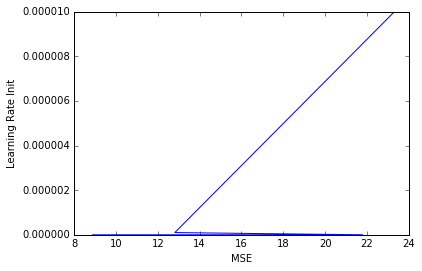

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

nums = [59.4,8,66.63,0.19,27.5,47.97,14.5,1.49,7.27,0.19]
nums = pandas.Series(nums)
print(nums.mean())
nums2 = [2.53,5.15,3.99,30.7,4.13,6.42,50.75,21.0,2.26,1.22]
nums2 = pandas.Series(nums2)
print(nums2.mean())
nums3 = [38.67,0.05,14.43,0.12,0.44,92.5,5.5,5.97,0.22,59.98]
nums3 = pandas.Series(nums3)
print(nums3.mean())
nums4 = [1.63,0.08,3.64,3.66,6.8,0.09,11.22,49.82,4.94,6.86]
nums4 = pandas.Series(nums4)
print(nums4.mean())
nums5 = [0.074,36.71,32.4,22.4,7.16,4.7,0.46,30.5,30.5,3.12]
nums5 = pandas.Series(nums5)
print(nums5.mean())
x = [nums.mean(),nums2.mean(),nums3.mean(),nums4.mean()]
y = [0.00001,0.0000001,0.000000001,0.00000000001]
plt.plot(x,y)
plt.xlabel('MSE')
plt.ylabel('Learning Rate Init')
plt.plot()

### Housing Data Regression Using Stochastic Gradient Descent###

#### MLP Default ###
Default average MSE value was ```146343.48``` over 10 runs. It was also very slow.

#### Solver ####

The documentation for MLPRegressor says that for smaller data sets, ```lbfgs``` solver may perform better. I tried that with a ```learning_rate_init``` of ```0.00001``` and the results were better, with an average MSE value of ```43138.455``` over 10 runs.

#### Activation Function ####

The activation function seemed to be very important in MSE and MAE values. With an activation of ```identity```, and a learning rate of ```adaptive```, the average MSE values over 10 runs dropped to ```10.05```.

#### Initial Learning Rate ####

The initial learning rate took some adjusting. 

![learning_rate_init](initLRgraph.png)

| Learning Rate  | Average MSE   
| -------------  |:-------------:|
| 0.00001        | 23.31         |
| 0.0000001      | 12.82         |
| 0.00000000001  | 8.87          |
| 0.0000000000001| 16.8          |

Numbers less than 1x10^-13 yielded higher MSE values.

#### Conclusion ####

Other settings listed in the MLP documentation didn't make significant improvements to the MSE values. 

The SGD algorithm performed significantly better than MLP. INSERT REASONING HERE